#### Basic Info
- [Site Info]( https://www.stathletes.com/big-data-cup/)
-[Github Repository](https://github.com/bigdatacup/Big-Data-Cup-2021)
-[Hockey Graphs Inspo](https://hockey-graphs.com/category/passing-data/)

## Plans/Ideas

### Zone Entry and Scoring Chances
1. Code scoring chance and high danger scoring chance function
2. Generate new chunk function to determine what happens in the chunk after a zone entry
3. For different projects
  - Erie 
    - Compare Otter's performance against teams that are good at defending certain types of zone entries
  - NWHL
    - can rank efficencies across the league

### Breakouts
Analyze different breakout patterns across teams. See where passes originate from. Can help with forecheck and defense

### Player ratings based on sequence efficency

### Good or Bad Penalties
Is it better to take a penalty or a high danger chance





In [1]:
# bread and butter libraries
import numpy as np
import pandas as pd

# Load Data

In [2]:
olympic = pd.read_csv("https://raw.githubusercontent.com/bigdatacup/Big-Data-Cup-2021/main/hackathon_womens.csv")
olympic.columns = ['gameDate', 'home', 'away', 'period', 'clock',
       'homeSkaters', 'awaySkaters', 'homeGoals',
       'awayGoals', 'team', 'player', 'event', 'X',
       'Y', 'd1', 'd2', 'd3', 'd4',
       'player2', 'X2', 'Y2']
olympic

,gameDate,home,away,period,clock,homeSkaters,awaySkaters,homeGoals,awayGoals,team,player,event,X,Y,d1,d2,d3,d4,player2,X2,Y2
0,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,20:00,5,5,0,0,Olympic (Women) - Canada,Emily Clark,Faceoff Win,100,42,Backhand,NaN,NaN,NaN,Lyudmila Belyakova,NaN,NaN
1,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,19:59,5,5,0,0,Olympic (Women) - Canada,Meaghan Mikkelson,Puck Recovery,91,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,19:59,5,5,0,0,Olympic (Women) - Canada,Meaghan Mikkelson,Dump In/Out,106,81,Retained,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,19:59,5,5,0,0,Olympic (Women) - Canada,Meaghan Mikkelson,Zone Entry,106,81,Dumped,NaN,NaN,NaN,Liana Ganeyeva,NaN,NaN
4,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,19:53,5,5,0,0,Olympic (Women) - Canada,Sarah Nurse,Puck Recovery,168,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23997,2019-04-14,Olympic (Women) - Finland,Olympic (Women) - United States,4,0:09,4,3,1,1,Olympic (Women) - Finland,Michelle Karvinen,Play,178,82,Direct,NaN,NaN,NaN,Jenni Hiirikoski,132.0,62.0
23998,2019-04-14,Olympic (Women) - Finland,Olympic (Women) - United States,4,0:07,4,3,1,1,Olympic (Women) - Finland,Jenni Hiirikoski,Play,136,48,Direct,NaN,NaN,NaN,Minnamari Tuominen,146.0,28.0
23999,2019-04-14,Olympic (Women) - Finland,Olympic (Women) - United States,4,0:06,4,3,1,1,Olympic (Women) - Finland,Minnamari Tuominen,Play,146,28,Direct,NaN,NaN,NaN,Michelle Karvinen,173.0,63.0
24000,2019-04-14,Olympic (Women) - Finland,Olympic (Women) - United States,4,0:04,4,3,1,1,Olympic (Women) - Finland,Michelle Karvinen,Incomplete Play,172,61,Direct,NaN,NaN,NaN,Rosa Lindstedt,181.0,43.0


In [3]:
nwhl = pd.read_csv("https://raw.githubusercontent.com/bigdatacup/Big-Data-Cup-2021/main/hackathon_nwhl.csv")
nwhl.columns = ['gameDate', 'home', 'away', 'period', 'clock',
       'homeSkaters', 'awaySkaters', 'homeGoals',
       'awayGoals', 'team', 'player', 'event', 'X',
       'Y', 'd1', 'd2', 'd3', 'd4',
       'player2', 'X2', 'Y2']
nwhl

,gameDate,home,away,period,clock,homeSkaters,awaySkaters,homeGoals,awayGoals,team,player,event,X,Y,d1,d2,d3,d4,player2,X2,Y2
0,2021-01-23,Minnesota Whitecaps,Boston Pride,1,20:00,5,5,0,0,Boston Pride,Jillian Dempsey,Faceoff Win,100,43,Backhand,NaN,NaN,NaN,Stephanie Anderson,NaN,NaN
1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:58,5,5,0,0,Boston Pride,McKenna Brand,Puck Recovery,107,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:57,5,5,0,0,Boston Pride,McKenna Brand,Zone Entry,125,28,Carried,NaN,NaN,NaN,Maddie Rowe,NaN,NaN
3,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:55,5,5,0,0,Boston Pride,McKenna Brand,Shot,131,28,Snapshot,On Net,t,f,NaN,NaN,NaN
4,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:53,5,5,0,0,Boston Pride,Tereza Vanisova,Faceoff Win,169,21,Backhand,NaN,NaN,NaN,Stephanie Anderson,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26877,2021-02-01,Buffalo Beauts,Boston Pride,3,0:06,4,5,1,7,Buffalo Beauts,Megan Delay,Puck Recovery,8,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26878,2021-02-01,Buffalo Beauts,Boston Pride,3,0:06,4,5,1,7,Buffalo Beauts,Megan Delay,Play,8,61,Indirect,NaN,NaN,NaN,Cassidy MacPherson,29.0,82.0
26879,2021-02-01,Buffalo Beauts,Boston Pride,3,0:05,4,5,1,7,Buffalo Beauts,Cassidy MacPherson,Dump In/Out,34,84,Lost,NaN,NaN,NaN,NaN,NaN,NaN
26880,2021-02-01,Buffalo Beauts,Boston Pride,3,0:03,4,5,1,7,Boston Pride,Briana Mastel,Puck Recovery,132,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Classification Functions

### Plot Ice

In [4]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

def plotIce():
  """
  This function plots an NHL size sheet of Ice
  """
  img = mpimg.imread('/content/2640570_orig.png')
  fig, ax = plt.subplots(figsize=(15,20))
  imgplot = ax.imshow(img, extent=[-100,100,-42.5,42.5])

  highDang = np.array([(-89,-9),(-69,-22),(-54,-22),(-54,-9),(-44,-9),(-44,9),(-54,9),(-54,22),(-69,22),(-89,9),(-69,9),(-69,-9)])

  circ = plt.Rectangle((69,-9), 20, 18, color="red", alpha = 0.3)
  tri = plt.Polygon(highDang*-1, color = "yellow", alpha=0.3)
  fig.gca().add_patch(circ)
  fig.gca().add_patch(tri)
  # plt.axis(False)
  return fig, ax

### High Danger


#### Polygon Function

In [5]:
# function is from geeksforgeeks

INT_MAX = 10000
 
# Given three colinear points p, q, r,  
# the function checks if point q lies 
# on line segment 'pr' 
def onSegment(p:tuple, q:tuple, r:tuple) -> bool:
     
    if ((q[0] <= max(p[0], r[0])) &
        (q[0] >= min(p[0], r[0])) &
        (q[1] <= max(p[1], r[1])) &
        (q[1] >= min(p[1], r[1]))):
        return True
         
    return False
 
# To find orientation of ordered triplet (p, q, r). 
# The function returns following values 
# 0 --> p, q and r are colinear 
# 1 --> Clockwise 
# 2 --> Counterclockwise 
def orientation(p:tuple, q:tuple, r:tuple) -> int:
     
    val = (((q[1] - p[1]) *
            (r[0] - q[0])) -
           ((q[0] - p[0]) *
            (r[1] - q[1])))
            
    if val == 0:
        return 0
    if val > 0:
        return 1 # Collinear
    else:
        return 2 # Clock or counterclock
 
def doIntersect(p1, q1, p2, q2):
     
    # Find the four orientations needed for  
    # general and special cases 
    o1 = orientation(p1, q1, p2)
    o2 = orientation(p1, q1, q2)
    o3 = orientation(p2, q2, p1)
    o4 = orientation(p2, q2, q1)
 
    # General case
    if (o1 != o2) and (o3 != o4):
        return True
     
    # Special Cases 
    # p1, q1 and p2 are colinear and 
    # p2 lies on segment p1q1 
    if (o1 == 0) and (onSegment(p1, p2, q1)):
        return True
 
    # p1, q1 and p2 are colinear and 
    # q2 lies on segment p1q1 
    if (o2 == 0) and (onSegment(p1, q2, q1)):
        return True
 
    # p2, q2 and p1 are colinear and 
    # p1 lies on segment p2q2 
    if (o3 == 0) and (onSegment(p2, p1, q2)):
        return True
 
    # p2, q2 and q1 are colinear and 
    # q1 lies on segment p2q2 
    if (o4 == 0) and (onSegment(p2, q1, q2)):
        return True
 
    return False
 
# Returns true if the point p lies  
# inside the polygon[] with n vertices 
def is_inside_polygon(points:list, p:tuple) -> bool:
     
    n = len(points)
     
    # There must be at least 3 vertices
    # in polygon
    if n < 3:
        return False
         
    # Create a point for line segment
    # from p to infinite
    extreme = (INT_MAX, p[1])
    count = i = 0
     
    while True:
        next = (i + 1) % n
         
        # Check if the line segment from 'p' to  
        # 'extreme' intersects with the line  
        # segment from 'polygon[i]' to 'polygon[next]' 
        if (doIntersect(points[i],
                        points[next], 
                        p, extreme)):
                             
            # If the point 'p' is colinear with line  
            # segment 'i-next', then check if it lies  
            # on segment. If it lies, return true, otherwise false 
            if orientation(points[i], p, 
                           points[next]) == 0:
                return onSegment(points[i], p, 
                                 points[next])
                                  
            count += 1
             
        i = next
         
        if (i == 0):
            break
         
    # Return true if count is odd, false otherwise 
    return (count % 2 == 1)
# This code is contributed by Vikas Chitturi

### High Danger Function

In [6]:
def timetoSecs(t): 
  new = t.split(":")
  if ((int(new[1]) == 0) & (int(new[0]) == 0)):
    new = 0
  elif int(new[1]) == 0:
    new = int(new[0].lstrip('0'))*60
  elif int(new[0]) == 0:
    new = int(new[1].lstrip('0'))
  else:
    new = int(new[0].lstrip('0'))*60 + int(new[1].lstrip('0'))
  return new

In [7]:
def isHighDanger(x, y, ax, df):
  '''
  inputs x and y coordinates of a data frame that contains only shots and goals, 
  '''
  try:
    point = (x,y)
    score = 0
    highDang = np.array([(-89,-9),(-69,-22),(-54,-22),(-54,-9),(-44,-9),(-44,9),(-54,9),(-54,22),(-69,22),(-89,9),(-69,9),(-69,-9)])
    #find initial score based on shot location
    if is_inside_polygon(highDang*-1, point):
      score += 2
    elif is_inside_polygon([(69, -9), (69, 9), (89, 9), (89, -9)], point):
      score+= 3
    else:
      score+= 1
    # add halfpoints for traffic and for one timers

    time = timetoSecs(df.loc[ax, "clock"])
    team = df.loc[ax, "team"]

    index = ax-1
    time1 = time
    reboundFlag, rushFlag = False, False
    while (time1 < time + 4):
      # print(f"Orig time: {time}, current time: {time1}, index: {index}, og time: {df.loc[ax, 'clock']} ")
      time1 = timetoSecs(df.loc[index, "clock"])
      currentEvent = df.loc[index, "event"]
      currentTeam = df.loc[index, "team"]

      # check for rebounds
      if (currentTeam == team and reboundFlag != True):
        if (currentEvent == "Shot" or currentEvent == "Goal"):
          score += 1
          df.loc[ax, 'isRebound'] = 1
          reboundFlag = True
      
      #check for rush
      # print(df.loc[index, "X"])
      if ((df.loc[index, "X"] <= 24) and rushFlag != True):
        score += 1
        df.loc[ax, 'isRush'] = 1
        rushFlag = True
    
      # stop if either rebound and rush is True, exhausting all possibilities
      if reboundFlag and rushFlag:
        break
      
      index = index - 1
  except KeyError:
    return 0
  return score

### Determine HighLow or Lateral

In [8]:
def isLat(X, Y, X2, Y2):
  if ((X >= 54) & (Y <= -22) | (Y >= 22)) & ((X2 >= 54) & (Y2 <= -22) | (Y2 >= 22)) & (X >= 54):
    return 1
  else:
    return 0
def isLowHigh(X, Y, X2, Y2):
  if ((X2 <= 44) & (X2 >= 24)) & (X >= 69):
    return 1
  else:
    return 0

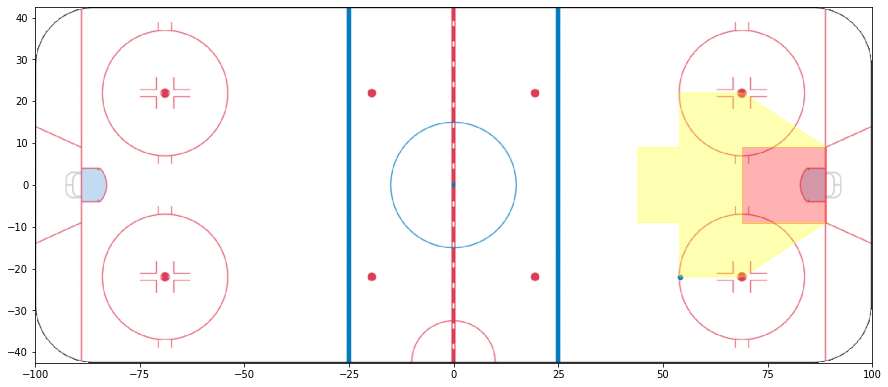

In [9]:
fig, ax = plotIce()
sns.scatterplot(x=[54], y = [-22], ax = ax)

### Seperate Chunks

In [10]:
def seperateChunks(df):
  print("Staring")
  sequences = []
  seq = []
  team = df.iloc[0]["team"]

  # establish empty chunkCount column

  df['chunk'], df['chunkIdx'] = np.NaN, np.NaN
  maxlen = 0
  chunkCount = 0
  itercount = 0
  # print(team)
  for index, rows in df.iterrows():
    # print(index, chunkCount)
    # print(team, rows["team"])
    if ((team != rows["team"]) | (rows['event'] == 'Faceoff Win')):
      # print("row is different team")
      sequences.append(seq)
      chunkCount += 1
      itercount = 0
      seq = []
    if len(seq) == 0:
      # print("establish new team")
      team = rows["team"]
    if team == rows["team"]:
      # print("row is same team")
      seq.append(rows.to_numpy())
    df.loc[index,'chunk'] = chunkCount
    df.loc[index,'chunkIdx'] = itercount
    itercount += 1
  return toArray(sequences) # for LTSM
  # return np.asarray(sequences, dtype=object)

def toArray(seq):
  holla = seq
  maxlen = 0
  for i in seq:
    if len(i) > maxlen:
      maxlen = len(i)
  counter = 0
  for i in holla:
    if len(i) < maxlen:
      holla[counter] = i + [[0 for i in range(21)]]*(maxlen-len(i))
    counter += 1
  return np.asarray(holla, dtype=object)

### Map Pass Events

In [11]:
def mapPassEvents(chunk, fig, ax):
  chunk = chunk.fillna(0)
  
  sns.scatterplot(x='X', y = 'Y', data=chunk, style='event', ax=ax, hue='xG', palette='RdBu', s = 300, alpha = 1)
  colors = {
        'Incomplete Play': 'red',
        'Play': 'blue',
        'On Net': 'green',
        'Missed': 'grey',
        'Blocked': 'firebrick'
    }
  tofP = {
      'Direct': '-',
      'Indirect': '-.',
      't': '-.',
      'f' :'--'
    }
  count = 0
  for index, play in chunk.iterrows():
    # if the iteration is the first
    if count == 0:
      count += 1
      continue
    
    # current play is not a pass
    if ((play['event'] != "Play") and (play['event'] != "Incomplete Play")):
      if ((chunk.loc[index-1].event != 'Play') and (chunk.loc[index-1].event != "Incomplete Play")): # play before is not a pass
        if (chunk.loc[index-1].event != 'Shot'):
          nopassArrow(ax, chunk.loc[index-1]['X'], chunk.loc[index-1]['Y'], play['X'], play['Y'], count)
          count += 1
        else: 
          cColor = colors[chunk.loc[index-1]['d2']]
          ctype = tofP[chunk.loc[index-1]['d3']]
          ax.plot([chunk.loc[index-1]['X'], 89], [chunk.loc[index-1]['Y'], 0], color = cColor, linestyle=ctype)
      else: # if the play before is a pass
        ax.arrow(chunk.loc[index-1]['X2'], chunk.loc[index-1]['Y2'], (play['X'] - chunk.loc[index-1]['X2']), (play['Y'] - chunk.loc[index-1]['Y2']), 
              head_width=1, linestyle = "-", color = "grey", width=0.5, alpha = 0.15,)
        midpointX = (play['X'] + chunk.loc[index-1]['X2']) / 2
        midpointY = (play['Y'] + chunk.loc[index-1]['Y2']) / 2
        ax.annotate(count, (midpointX, midpointY),)
        count += 1


    if (play['event'] == "Play") or (play['event'] == "Incomplete Play"): # if current play is a pass
      if (((chunk.loc[index-1].event == 'Play') or (chunk.loc[index-1].event == "Incomplete Play"))): # if the play before is also a pass
        nopassArrow(ax, chunk.loc[index-1]['X2'], chunk.loc[index-1]['Y2'], play['X'], play['Y'], count)
        count += 1
      else: #if current play is a pass and play before is not a pass
        nopassArrow(ax, chunk.loc[index-1]['X'], chunk.loc[index-1]['Y'], play['X'], play['Y'], count)
        count += 1

      cColor = colors[play['event']]
      ctype = tofP[play['d1']]
      ax.arrow(play['X'], play['Y'], (play['X2'] - play['X']), (play['Y2'] - play['Y']), head_width=3, linestyle = ctype, color = cColor, width=1, alpha = 0.3,)
      midpointX = (play['X'] + play['X2']) / 2
      midpointY = (play['Y'] + play['Y2']) / 2
      ax.annotate(count, (midpointX, midpointY), color = "red")
      # print(f'play now: {count}, {index}')
      count+= 1
  ax.set_title(f'Team: {play.loc["team"]}')

def nopassArrow(ax, startX, startY, endX, endY, count):
  ax.arrow(startX, startY, (endX - startX), (endY - startY), 
              head_width=1, linestyle = "-", color = "grey", width=0.5, alpha = 0.15,)
  midpointX = (startX + endX) / 2
  midpointY = (startY + endY) / 2
  ax.annotate(count, (midpointX, midpointY))

## Transform Data

In [12]:
data = pd.concat((nwhl, olympic)).reset_index()
data['Y'] = data['Y'] - 42.5
data['X'] = data['X'] - 100
data['Y2'] = data['Y2'] - 42.5
data['X2'] = data['X2'] - 100
data['isLat'] = data.apply(lambda x: isLat(x['X'], x['Y'], x['X2'], x['Y2']), axis = 1)
data['isLowHigh'] = data.apply(lambda x: isLowHigh(x['X'], x['Y'], x['X2'], x['Y2']), axis = 1)
data['shotQuality'] = data.loc[(data['event'] == "Shot") | (data['event'] == "Goal")].apply(lambda x: isHighDanger(x['X'],x['Y'], x.name, data), axis = 1)
data

,index,gameDate,home,away,period,clock,homeSkaters,awaySkaters,homeGoals,awayGoals,team,player,event,X,Y,d1,d2,d3,d4,player2,X2,Y2,isLat,isLowHigh,isRush,isRebound,shotQuality
0,0,2021-01-23,Minnesota Whitecaps,Boston Pride,1,20:00,5,5,0,0,Boston Pride,Jillian Dempsey,Faceoff Win,0,0.5,Backhand,NaN,NaN,NaN,Stephanie Anderson,NaN,NaN,0,0,NaN,NaN,NaN
1,1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:58,5,5,0,0,Boston Pride,McKenna Brand,Puck Recovery,7,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
2,2,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:57,5,5,0,0,Boston Pride,McKenna Brand,Zone Entry,25,-14.5,Carried,NaN,NaN,NaN,Maddie Rowe,NaN,NaN,0,0,NaN,NaN,NaN
3,3,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:55,5,5,0,0,Boston Pride,McKenna Brand,Shot,31,-14.5,Snapshot,On Net,t,f,NaN,NaN,NaN,0,0,1.0,NaN,2.0
4,4,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:53,5,5,0,0,Boston Pride,Tereza Vanisova,Faceoff Win,69,-21.5,Backhand,NaN,NaN,NaN,Stephanie Anderson,NaN,NaN,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50879,23997,2019-04-14,Olympic (Women) - Finland,Olympic (Women) - United States,4,0:09,4,3,1,1,Olympic (Women) - Finland,Michelle Karvinen,Play,78,39.5,Direct,NaN,NaN,NaN,Jenni Hiirikoski,32.0,19.5,0,1,NaN,NaN,NaN
50880,23998,2019-04-14,Olympic (Women) - Finland,Olympic (Women) - United States,4,0:07,4,3,1,1,Olympic (Women) - Finland,Jenni Hiirikoski,Play,36,5.5,Direct,NaN,NaN,NaN,Minnamari Tuominen,46.0,-14.5,0,0,NaN,NaN,NaN
50881,23999,2019-04-14,Olympic (Women) - Finland,Olympic (Women) - United States,4,0:06,4,3,1,1,Olympic (Women) - Finland,Minnamari Tuominen,Play,46,-14.5,Direct,NaN,NaN,NaN,Michelle Karvinen,73.0,20.5,0,0,NaN,NaN,NaN
50882,24000,2019-04-14,Olympic (Women) - Finland,Olympic (Women) - United States,4,0:04,4,3,1,1,Olympic (Women) - Finland,Michelle Karvinen,Incomplete Play,72,18.5,Direct,NaN,NaN,NaN,Rosa Lindstedt,81.0,0.5,0,0,NaN,NaN,NaN


In [13]:
data.iloc[48]

index                           48
gameDate                2021-01-23
home           Minnesota Whitecaps
away                  Boston Pride
period                           1
clock                        18:26
homeSkaters                      5
awaySkaters                      5
homeGoals                        0
awayGoals                        0
team                  Boston Pride
player                Lauren Kelly
event                         Shot
X                               96
Y                            -22.5
d1                        Snapshot
d2                          On Net
d3                               f
d4                               f
player2                        NaN
X2                             NaN
Y2                             NaN
isLat                            0
isLowHigh                        0
isRush                         NaN
isRebound                      NaN
shotQuality                      1
Name: 48, dtype: object

# Expected Goals

In [14]:
def distance(X,Y):
  return round(np.sqrt((89-X)**2 + (0 - Y)**2), 2)

In [15]:
import math
def shotAngle(X,Y):
  x0 = 89 - X
  return math.degrees(math.atan2(Y, x0))

In [16]:
def timeDiff(clock, series, df):
  idx = series.name
  if idx == 0:
    return 0
  return df.loc[idx - 1, 'clock'] - clock

In [17]:
xGData = data.copy()
xGData = xGData.drop(['gameDate', 'home', 'away', 'period', 'player', "player2", "X2", "Y2", "homeGoals", "awayGoals"], axis = 1)
xGData['shotDistance'] = xGData[(xGData['event'] == "Shot") | (xGData['event'] == "Goal")].apply(lambda x: distance(x["X"], x['Y']), axis = 1)
xGData['shotAngle'] = xGData[(xGData['event'] == "Shot") | (xGData['event'] == "Goal")].apply(lambda x: shotAngle(x["X"], x['Y']), axis = 1)
xGData['isGoal'] = xGData['event'].apply(lambda x: 1 if (x == "Goal") else 0)
xGData['clock'] = xGData['clock'].apply(timetoSecs)
xGData['timeDiff'] = xGData.apply(lambda x: timeDiff(x['clock'], x, xGData), axis = 1)
xGData # [(xGData['event'] == "Shot") | (xGData['event'] == "Goal")]

,index,clock,homeSkaters,awaySkaters,team,event,X,Y,d1,d2,d3,d4,isLat,isLowHigh,isRush,isRebound,shotQuality,shotDistance,shotAngle,isGoal,timeDiff
0,0,1200,5,5,Boston Pride,Faceoff Win,0,0.5,Backhand,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0
1,1,1198,5,5,Boston Pride,Puck Recovery,7,-2.5,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,2
2,2,1197,5,5,Boston Pride,Zone Entry,25,-14.5,Carried,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,1
3,3,1195,5,5,Boston Pride,Shot,31,-14.5,Snapshot,On Net,t,f,0,0,1.0,NaN,2.0,59.79,-14.036243,0,2
4,4,1193,5,5,Boston Pride,Faceoff Win,69,-21.5,Backhand,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50879,23997,9,4,3,Olympic (Women) - Finland,Play,78,39.5,Direct,NaN,NaN,NaN,0,1,NaN,NaN,NaN,NaN,NaN,0,2
50880,23998,7,4,3,Olympic (Women) - Finland,Play,36,5.5,Direct,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,2
50881,23999,6,4,3,Olympic (Women) - Finland,Play,46,-14.5,Direct,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,1
50882,24000,4,4,3,Olympic (Women) - Finland,Incomplete Play,72,18.5,Direct,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,2


## Chunks for passes and goals

In [18]:
def seperatePassShotChunks(df):
  print("Staring")
  sequences = []
  seq = []
  team = df.iloc[0]["team"]

  # establish empty chunkCount column

  df['chunk'], df['chunkIdx'] = np.NaN, np.NaN
  maxlen = 0
  chunkCount = 0
  itercount = 0
  for index, rows in df.iterrows():
    if ((rows["event"] == "Shot") | (rows['event'] == "Goal")): 
      sequences.append(seq)
      df.loc[index,'chunk'] = chunkCount
      df.loc[index,'chunkIdx'] = itercount
      chunkCount += 1
      itercount = 0
      seq = []
      continue
    if ((team != rows["team"])):
      # print("row is different team")
      sequences.append(seq)
      chunkCount += 1
      itercount = 0
      seq = []
    if len(seq) == 0:
      # print("establish new team")
      team = rows["team"]
    if team == rows["team"]:
      # print("row is same team")
      seq.append(rows.to_numpy())
    df.loc[index,'chunk'] = chunkCount
    df.loc[index,'chunkIdx'] = itercount
    itercount += 1
  return toArray(sequences) # for LTSM

In [19]:
passShot = xGData[(xGData['event'] == "Shot") | (xGData['event'] == "Goal") | (xGData['event'] == "Play") | (xGData['event'] == "Incomplete Play")]
seperatePassShotChunks(passShot)

Staring


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


array([[list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
        list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
        list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
        ...,
        list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
        list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
        list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])],
       [list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
        list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
        list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
        ...,
        list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
        list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
        list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])],
       [array([8, 1187, 

In [20]:
# chunks consisting of only passes and shots
passchunks = passShot.reset_index().set_index(['chunk', 'chunkIdx'])
passchunks

level_0  index  clock  ...  shotAngle  isGoal timeDiff
chunk   chunkIdx                         ...                            
0.0     0.0             3      3   1195  ... -14.036243       0        2
2.0     0.0             8      8   1187  ...        NaN       0        1
        1.0             9      9   1183  ...        NaN       0        4
3.0     0.0            11     11   1180  ...        NaN       0        0
4.0     0.0            14     14   1174  ...        NaN       0        2
...                   ...    ...    ...  ...        ...     ...      ...
10387.0 2.0         50876  23994     14  ...  45.567266       0        2
10388.0 0.0         50879  23997      9  ...        NaN       0        2
        1.0         50880  23998      7  ...        NaN       0        2
        2.0         50881  23999      6  ...        NaN       0        1
        3.0         50882  24000      4  ...        NaN       0        2

[24440 rows x 22 columns]

## Score Shots for quality of prior passes

In [21]:
np.unique(np.array(list(zip(*passchunks.index))[0]))

array([0.0000e+00, 2.0000e+00, 3.0000e+00, ..., 1.0386e+04, 1.0387e+04,
       1.0388e+04])

In [22]:
def countPassTypes(chunk):
  chas = np.unique(np.array(list(zip(*chunk.index))[0]))
  for index in chas:
    current = chunk.loc[index]
    current = current.fillna(0)

    try:
      shotIdx = int(current.iloc[-1].name)
    except ValueError:
      shotIdx = current.iloc[-1].name
    
    
    realIdx = current.loc[shotIdx, "index"]
    if (data.loc[realIdx, "event"] == "Shot"):
      passchunks.loc[(index, shotIdx), 'isReboundShot'] = 1
    if current.loc[shotIdx, "event"] != "Shot":
      continue
    if len(current) <= 3:
      subtract = shotIdx - (len(current) - 1)
    else:
      subtract = shotIdx - 3
    # print(current[subtract:shotIdx]['isLowHigh'])
    # find number of low high pass
    
    passchunks.loc[(index, shotIdx), 'lowHighCount'] = current[subtract:shotIdx]['isLowHigh'].sum()
    passchunks.loc[(index, shotIdx), 'latCount'] = current[subtract:shotIdx]['isLat'].sum()
    # print(passchunks.loc[(index, shotIdx), 'latCount'])

    # if (current['isLowHigh'].sum() > 0) | (current['isLat'].sum() > 0):
    #   print(index, current['isLat'].sum(), current['isLowHigh'].sum())
  

In [23]:
countPassTypes(passchunks)
# passchunks.loc[(595,5), 'latCount'] = "hate"
passchunks.loc[(593, 0), "index"]

2962

In [24]:
passchunks[passchunks["event"] == "Goal"]

,,level_0,index,clock,homeSkaters,awaySkaters,team,event,X,Y,d1,d2,d3,d4,isLat,isLowHigh,isRush,isRebound,shotQuality,shotDistance,shotAngle,isGoal,timeDiff,isReboundShot,lowHighCount,latCount
chunk,chunkIdx,,,,,,,,,,,,,,,,,,,,,,,,,
71.0,1.0,387,387,402,5,5,Boston Pride,Goal,75,1.5,Snapshot,On Net,f,f,0,0,1.0,NaN,4.0,14.08,6.115504,1,0,NaN,NaN,NaN
79.0,0.0,423,423,340,5,5,Minnesota Whitecaps,Goal,80,-3.5,Snapshot,On Net,f,f,0,0,1.0,1.0,5.0,9.66,-21.250506,1,0,NaN,NaN,NaN
167.0,0.0,879,879,482,5,5,Minnesota Whitecaps,Goal,88,12.5,Snapshot,On Net,t,f,0,0,NaN,1.0,2.0,12.54,85.426079,1,0,NaN,NaN,NaN
486.0,3.0,2382,2382,954,5,5,Connecticut Whale,Goal,44,-27.5,Snapshot,On Net,t,f,0,0,1.0,NaN,2.0,52.74,-31.429566,1,1,NaN,NaN,NaN
607.0,5.0,3052,3052,872,5,4,Buffalo Beauts,Goal,68,-14.5,Wristshot,On Net,t,f,0,0,NaN,NaN,2.0,25.52,-34.624155,1,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9773.0,4.0,47877,20995,729,5,5,Olympic (Women) - Canada,Goal,82,-2.5,Deflection,On Net,f,f,0,0,1.0,NaN,4.0,7.43,-19.653824,1,0,NaN,NaN,NaN
9841.0,0.0,48135,21253,224,5,5,Olympic (Women) - Finland,Goal,80,5.5,Deflection,On Net,f,f,0,0,NaN,1.0,4.0,10.55,31.429566,1,0,1.0,NaN,NaN
9953.0,0.0,48719,21837,40,5,6,Olympic (Women) - Finland,Goal,69,-3.5,Snapshot,On Net,f,f,0,0,1.0,NaN,3.0,20.30,-9.926246,1,2,NaN,NaN,NaN


In [25]:
data[420:430]

,index,gameDate,home,away,period,clock,homeSkaters,awaySkaters,homeGoals,awayGoals,team,player,event,X,Y,d1,d2,d3,d4,player2,X2,Y2,isLat,isLowHigh,isRush,isRebound,shotQuality
420,420,2021-01-23,Minnesota Whitecaps,Boston Pride,1,5:43,5,5,0,1,Minnesota Whitecaps,Audra Richards,Zone Entry,24,39.5,Carried,NaN,NaN,NaN,Kaleigh Fratkin,NaN,NaN,0,0,NaN,NaN,NaN
421,421,2021-01-23,Minnesota Whitecaps,Boston Pride,1,5:41,5,5,0,1,Minnesota Whitecaps,Audra Richards,Shot,73,23.5,Snapshot,On Net,f,f,NaN,NaN,NaN,0,0,1.0,NaN,2.0
422,422,2021-01-23,Minnesota Whitecaps,Boston Pride,1,5:40,5,5,0,1,Minnesota Whitecaps,Jonna Curtis,Puck Recovery,80,-3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
423,423,2021-01-23,Minnesota Whitecaps,Boston Pride,1,5:40,5,5,0,1,Minnesota Whitecaps,Jonna Curtis,Goal,80,-3.5,Snapshot,On Net,f,f,NaN,NaN,NaN,0,0,1.0,1.0,5.0
424,424,2021-01-23,Minnesota Whitecaps,Boston Pride,1,5:38,5,5,1,1,Minnesota Whitecaps,Stephanie Anderson,Faceoff Win,0,-0.5,Backhand,NaN,NaN,NaN,Lexie Laing,NaN,NaN,0,0,NaN,NaN,NaN
425,425,2021-01-23,Minnesota Whitecaps,Boston Pride,1,5:36,5,5,1,1,Minnesota Whitecaps,Emma Stauber,Puck Recovery,-33,-39.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
426,426,2021-01-23,Minnesota Whitecaps,Boston Pride,1,5:35,5,5,1,1,Minnesota Whitecaps,Emma Stauber,Incomplete Play,-23,-41.5,Indirect,NaN,NaN,NaN,Meghan Lorence,9.0,-40.5,0,0,NaN,NaN,NaN
427,427,2021-01-23,Minnesota Whitecaps,Boston Pride,1,5:32,5,5,1,1,Boston Pride,Taylor Turnquist,Puck Recovery,-30,40.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
428,428,2021-01-23,Minnesota Whitecaps,Boston Pride,1,5:30,5,5,1,1,Boston Pride,Taylor Turnquist,Play,-6,29.5,Direct,NaN,NaN,NaN,Lexie Laing,10.0,21.5,0,0,NaN,NaN,NaN
429,429,2021-01-23,Minnesota Whitecaps,Boston Pride,1,5:28,5,5,1,1,Boston Pride,Lexie Laing,Incomplete Play,21,15.5,Direct,NaN,NaN,NaN,Tori Sullivan,33.0,-4.5,0,0,NaN,NaN,NaN


### Rate shots

In [26]:
ratedShots = passchunks[(passchunks.loc[(slice(None),), "event"] == "Goal") | (passchunks.loc[(slice(None),), "event"] == "Shot")]
ratedShots[ratedShots.isRebound == 1]

,,level_0,index,clock,homeSkaters,awaySkaters,team,event,X,Y,d1,d2,d3,d4,isLat,isLowHigh,isRush,isRebound,shotQuality,shotDistance,shotAngle,isGoal,timeDiff,isReboundShot,lowHighCount,latCount
chunk,chunkIdx,,,,,,,,,,,,,,,,,,,,,,,,,
25.0,0.0,109,109,975,5,5,Boston Pride,Shot,88,6.5,Wrap Around,On Net,f,f,0,0,NaN,1.0,4.0,6.58,81.253838,0,1,1.0,0.0,0.0
76.0,0.0,412,412,353,5,5,Boston Pride,Shot,67,-15.5,Fan,Blocked,t,f,0,0,NaN,1.0,3.0,26.91,-35.166436,0,0,1.0,0.0,0.0
79.0,0.0,423,423,340,5,5,Minnesota Whitecaps,Goal,80,-3.5,Snapshot,On Net,f,f,0,0,1.0,1.0,5.0,9.66,-21.250506,1,0,NaN,NaN,NaN
92.0,0.0,483,483,203,4,5,Minnesota Whitecaps,Shot,83,-2.5,Snapshot,On Net,f,f,0,0,1.0,1.0,5.0,6.50,-22.619865,0,0,1.0,0.0,0.0
94.0,0.0,497,497,165,4,5,Boston Pride,Shot,77,-19.5,Snapshot,On Net,f,f,0,0,NaN,1.0,2.0,22.90,-58.392498,0,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10318.0,0.0,50559,23677,770,3,4,Olympic (Women) - United States,Shot,81,1.5,Snapshot,On Net,f,f,0,0,NaN,1.0,4.0,8.14,10.619655,0,0,NaN,0.0,0.0
10322.0,0.0,50586,23704,715,3,4,Olympic (Women) - United States,Shot,77,-5.5,Snapshot,Blocked,t,f,0,0,NaN,1.0,4.0,13.20,-24.623565,0,0,NaN,0.0,0.0
10367.0,0.0,50789,23907,237,4,4,Olympic (Women) - United States,Shot,85,6.5,Snapshot,Blocked,f,f,0,0,NaN,1.0,4.0,7.63,58.392498,0,0,NaN,0.0,0.0


In [27]:
erie = pd.read_csv("https://raw.githubusercontent.com/bigdatacup/Big-Data-Cup-2021/main/hackathon_scouting.csv")

# make column names better
erie.columns = ['gameDate', 'home', 'away', 'period', 'clock',
       'homeSkaters', 'awaySkaters', 'homeGoals',
       'awayGoals', 'team', 'player', 'event', 'X',
       'Y', 'd1', 'd2', 'd3', 'd4',
       'player2', 'X2', 'Y2']

# scale coordinates to be aligned with the NHL, center ice is (0,0)
erie['Y'] = erie['Y'] - 42.5
erie['X'] = erie['X'] - 100
erie['Y2'] = erie['Y2'] - 42.5
erie['X2'] = erie['X2'] - 100
erie

,gameDate,home,away,period,clock,homeSkaters,awaySkaters,homeGoals,awayGoals,team,player,event,X,Y,d1,d2,d3,d4,player2,X2,Y2
0,2019-09-20,Erie Otters,Sudbury Wolves,1,20:00,5,5,0,0,Sudbury Wolves,Blake Murray,Faceoff Win,0,0.5,Forehand,NaN,NaN,NaN,Connor Lockhart,NaN,NaN
1,2019-09-20,Erie Otters,Sudbury Wolves,1,19:58,5,5,0,0,Sudbury Wolves,Emmett Serensits,Puck Recovery,-33,34.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-09-20,Erie Otters,Sudbury Wolves,1,19:53,5,5,0,0,Sudbury Wolves,Emmett Serensits,Incomplete Play,-55,6.5,Direct,NaN,NaN,NaN,Blake Murray,-26.0,-7.5
3,2019-09-20,Erie Otters,Sudbury Wolves,1,19:52,5,5,0,0,Erie Otters,Hayden Fowler,Puck Recovery,-11,-6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-09-20,Erie Otters,Sudbury Wolves,1,19:51,5,5,0,0,Erie Otters,Hayden Fowler,Incomplete Play,-18,6.5,Direct,NaN,NaN,NaN,Connor Lockhart,-6.0,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75868,2020-03-08,Erie Otters,Saginaw Spirit,3,0:07,6,5,3,4,Erie Otters,Jacob Golden,Puck Recovery,77,-41.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75869,2020-03-08,Erie Otters,Saginaw Spirit,3,0:06,6,5,3,4,Erie Otters,Jacob Golden,Play,84,-35.5,Direct,NaN,NaN,NaN,Hayden Fowler,90.0,-28.5
75870,2020-03-08,Erie Otters,Saginaw Spirit,3,0:04,6,5,3,4,Erie Otters,Hayden Fowler,Play,93,-19.5,Direct,NaN,NaN,NaN,Maxim Golod,38.0,-16.5
75871,2020-03-08,Erie Otters,Saginaw Spirit,3,0:03,6,5,3,4,Erie Otters,Maxim Golod,Shot,37,-8.5,Slapshot,Blocked,t,f,NaN,NaN,NaN


In [28]:
eSOG = erie.loc[erie['d2'] == "On Net"]
erie['shotQuality'] = eSOG.apply(lambda x: isHighDanger(x['X'],x['Y'], x.name, erie), axis = 1)
eSOG = erie.loc[(erie['event'] == "Shot") & (erie['d2'] == "On Net")]
eS = erie.loc[erie['event'] == "Shot"]
eSOGG = erie.loc[(erie['d2'] == "On Net")]
eG = erie.loc[(erie['event'] == "Goal")]
# eHDSOG = eSOG[eSOG['shotQuality'] == 3]
eG

,gameDate,home,away,period,clock,homeSkaters,awaySkaters,homeGoals,awayGoals,team,player,event,X,Y,d1,d2,d3,d4,player2,X2,Y2,isRush,isRebound,shotQuality
199,2019-09-20,Erie Otters,Sudbury Wolves,1,13:43,5,5,0,0,Erie Otters,Maxim Golod,Goal,82,1.5,Snapshot,On Net,f,f,NaN,NaN,NaN,1.0,NaN,4.0
454,2019-09-20,Erie Otters,Sudbury Wolves,1,5:38,5,5,1,0,Sudbury Wolves,Quinton Byfield,Goal,67,14.5,Snapshot,On Net,f,f,NaN,NaN,NaN,1.0,NaN,3.0
1202,2019-09-20,Erie Otters,Sudbury Wolves,2,2:44,5,5,1,1,Sudbury Wolves,Quinton Byfield,Goal,70,-3.5,Wristshot,On Net,t,f,NaN,NaN,NaN,1.0,NaN,4.0
1544,2019-09-20,Erie Otters,Sudbury Wolves,3,11:54,5,5,1,2,Erie Otters,Kurtis Henry,Goal,45,-33.5,Wristshot,On Net,t,f,NaN,NaN,NaN,NaN,NaN,1.0
1703,2019-09-20,Erie Otters,Sudbury Wolves,3,7:06,5,5,2,2,Erie Otters,Daniel D'Amato,Goal,73,-2.5,Snapshot,On Net,f,t,NaN,NaN,NaN,1.0,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75090,2020-03-08,Erie Otters,Saginaw Spirit,2,6:43,4,5,1,1,Saginaw Spirit,Damien Giroux,Goal,86,-2.5,Snapshot,On Net,f,t,NaN,NaN,NaN,NaN,1.0,4.0
75263,2020-03-08,Erie Otters,Saginaw Spirit,2,1:28,4,4,1,2,Saginaw Spirit,Cole Perfetti,Goal,69,-9.5,Wristshot,On Net,f,f,NaN,NaN,NaN,1.0,NaN,3.0
75352,2020-03-08,Erie Otters,Saginaw Spirit,3,18:10,5,5,1,3,Erie Otters,Chad Yetman,Goal,85,-5.5,Snapshot,On Net,f,f,NaN,NaN,NaN,1.0,NaN,4.0
75401,2020-03-08,Erie Otters,Saginaw Spirit,3,16:30,5,5,2,3,Saginaw Spirit,Danil Antropov,Goal,76,-8.5,Wristshot,On Net,f,f,NaN,NaN,NaN,NaN,NaN,3.0


In [29]:
#score all Corsi events
nwhl['shotQuality'] = nwhl.loc[(nwhl['event'] == "Shot") | (nwhl['event'] == "Goal")].apply(lambda x: isHighDanger(x['X'],x['Y'], x.name, nwhl), axis = 1)

# Creating Expected Goal Model

In [30]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [31]:
modelDf = ratedShots.set_index('level_0').drop(['index', 'team', 'event', 'isLat', 'isLowHigh', 'lowHighCount', 'latCount',"d2"], axis = 1)
modelDf

,clock,homeSkaters,awaySkaters,X,Y,d1,d3,d4,isRush,isRebound,shotQuality,shotDistance,shotAngle,isGoal,timeDiff,isReboundShot
level_0,,,,,,,,,,,,,,,,
3,1195,5,5,31,-14.5,Snapshot,t,f,1.0,NaN,2.0,59.79,-14.036243,0,2,1.0
20,1161,5,5,62,-40.5,Snapshot,f,f,1.0,NaN,2.0,48.67,-56.309932,0,2,1.0
29,1147,5,5,67,-24.5,Snapshot,f,f,1.0,NaN,2.0,32.93,-48.077455,0,1,1.0
43,1114,5,5,75,25.5,Snapshot,f,f,1.0,NaN,2.0,29.09,61.232351,0,2,1.0
48,1106,5,5,96,-22.5,Snapshot,f,f,NaN,NaN,1.0,23.56,-107.281498,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50832,118,5,4,57,-26.5,Wristshot,t,f,1.0,NaN,2.0,41.55,-39.629005,0,2,NaN
50847,84,4,3,50,-25.5,Slapshot,t,t,NaN,NaN,1.0,46.60,-33.178512,0,1,NaN
50861,42,4,3,66,-13.5,Wristshot,t,f,NaN,NaN,2.0,26.67,-30.411081,0,1,NaN


## Preprocessing

In [32]:
y = modelDf['isGoal'].apply(int)
y

level_0
3        0
20       0
29       0
43       0
48       0
        ..
50832    0
50847    0
50861    0
50866    0
50876    0
Name: isGoal, Length: 3656, dtype: int64

In [33]:
ss = StandardScaler()
mm = MinMaxScaler()
X = modelDf.drop(['isGoal', 'clock'], axis = 1)
X[["shotDistance", "shotAngle",]] = ss.fit_transform(X[["shotDistance", "shotAngle",]])
X[["homeSkaters",	"awaySkaters",	"X",	"Y", "timeDiff", "shotQuality"]] = mm.fit_transform(X[["homeSkaters",	"awaySkaters",	"X",	"Y", "timeDiff",  "shotQuality"]])
X['d3'] = X['d3'].apply(lambda x: 1 if x == True else 0)
X['d4'] = X['d4'].apply(lambda x: 1 if x == True else 0)
X.fillna(0, inplace=True) # only NaN's are in isRush and isRebound
X = pd.get_dummies(X) # includes first levels: deflection and on net
X

,homeSkaters,awaySkaters,X,Y,d3,d4,isRush,isRebound,shotQuality,shotDistance,shotAngle,timeDiff,isReboundShot,d1_Deflection,d1_Fan,d1_Slapshot,d1_Snapshot,d1_Wrap Around,d1_Wristshot
level_0,,,,,,,,,,,,,,,,,,,
3,0.666667,0.666667,0.637363,0.321429,0,0,1.0,0.0,0.25,1.301890,-0.342506,0.153846,1.0,0,0,0,1,0,0
20,0.666667,0.666667,0.807692,0.011905,0,0,1.0,0.0,0.25,0.701811,-1.365394,0.153846,1.0,0,0,0,1,0,0
29,0.666667,0.666667,0.835165,0.202381,0,0,1.0,0.0,0.25,-0.147582,-1.166195,0.076923,1.0,0,0,0,1,0,0
43,0.666667,0.666667,0.879121,0.797619,0,0,1.0,0.0,0.25,-0.354803,1.478753,0.153846,1.0,0,0,0,1,0,0
48,0.666667,0.666667,0.994505,0.226190,0,0,0.0,0.0,0.00,-0.653224,-2.598743,0.000000,1.0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50832,0.666667,0.333333,0.780220,0.178571,0,0,1.0,0.0,0.25,0.317588,-0.961769,0.153846,0.0,0,0,0,0,0,1
50847,0.333333,0.000000,0.741758,0.190476,0,0,0.0,0.0,0.00,0.590106,-0.805688,0.076923,0.0,0,0,1,0,0,0
50861,0.333333,0.000000,0.829670,0.333333,0,0,0.0,0.0,0.25,-0.485396,-0.738725,0.076923,0.0,0,0,0,0,0,1


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y , stratify=y, test_size = 0.3,)

In [35]:
y_train[y_train == 1].count()

92

## Model Creation

In [53]:
lr = LogisticRegression(class_weight='balanced', multi_class='multinomial', solver='newton-cg', fit_intercept=True)
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))
lr.predict(X,)[1:10]

0.8231540565177757


array([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [37]:
LR = LinearRegression()
LR.fit(X_train, y_train)
LR.score(X_train, y_train)
LR.predict(X,)[1:10]

array([-0.01769181, -0.00420029, -0.01334618,  0.00479016,  0.09618916,
       -0.00907836,  0.03114238, -0.00914404, -0.00116742])

In [38]:
from sklearn.metrics import confusion_matrix

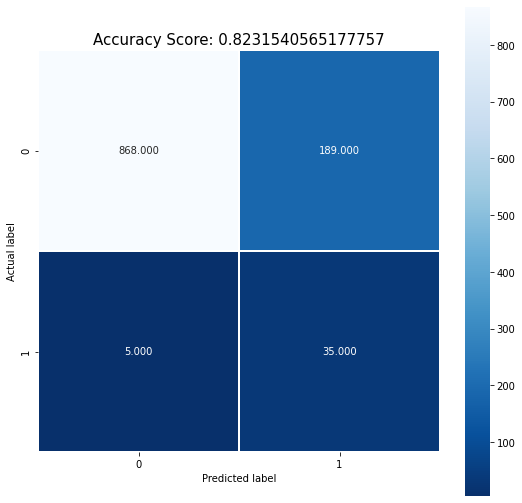

In [55]:
predictions = lr.predict(X_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = f'Accuracy Score: {lr.score(X_test, y_test)}'
plt.title(all_sample_title, size = 15);

In [40]:
lr.intercept_[0]

1.4092935690249218

In [41]:
def xGcalc(series, model):
  vec = model.intercept_[0] + ((series.to_numpy() * model.coef_).sum())
  return 1/(1 + np.exp(-vec))

In [42]:
withxG = X.copy()
withxG['xG'] = withxG.apply(lambda x: xGcalc(x, lr), axis = 1)
withxG = withxG[['xG',]]
withxG

,xG
level_0,
3,0.097787
20,0.102889
29,0.144317
43,0.129459
48,0.151615
...,...
50832,0.427710
50847,0.481118
50861,0.652726


In [43]:
data = data.join(withxG,how='left',lsuffix = " ", rsuffix = " ")
data = data.join(ratedShots.set_index('index')[['lowHighCount', 'latCount']], how="left", lsuffix="")
data

,index,gameDate,home,away,period,clock,homeSkaters,awaySkaters,homeGoals,awayGoals,team,player,event,X,Y,d1,d2,d3,d4,player2,X2,Y2,isLat,isLowHigh,isRush,isRebound,shotQuality,xG,lowHighCount,latCount
0,0,2021-01-23,Minnesota Whitecaps,Boston Pride,1,20:00,5,5,0,0,Boston Pride,Jillian Dempsey,Faceoff Win,0,0.5,Backhand,NaN,NaN,NaN,Stephanie Anderson,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:58,5,5,0,0,Boston Pride,McKenna Brand,Puck Recovery,7,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:57,5,5,0,0,Boston Pride,McKenna Brand,Zone Entry,25,-14.5,Carried,NaN,NaN,NaN,Maddie Rowe,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:55,5,5,0,0,Boston Pride,McKenna Brand,Shot,31,-14.5,Snapshot,On Net,t,f,NaN,NaN,NaN,0,0,1.0,NaN,2.0,0.097787,0.0,0.0
4,4,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:53,5,5,0,0,Boston Pride,Tereza Vanisova,Faceoff Win,69,-21.5,Backhand,NaN,NaN,NaN,Stephanie Anderson,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50879,23997,2019-04-14,Olympic (Women) - Finland,Olympic (Women) - United States,4,0:09,4,3,1,1,Olympic (Women) - Finland,Michelle Karvinen,Play,78,39.5,Direct,NaN,NaN,NaN,Jenni Hiirikoski,32.0,19.5,0,1,NaN,NaN,NaN,NaN,NaN,NaN
50880,23998,2019-04-14,Olympic (Women) - Finland,Olympic (Women) - United States,4,0:07,4,3,1,1,Olympic (Women) - Finland,Jenni Hiirikoski,Play,36,5.5,Direct,NaN,NaN,NaN,Minnamari Tuominen,46.0,-14.5,0,0,NaN,NaN,NaN,NaN,NaN,NaN
50881,23999,2019-04-14,Olympic (Women) - Finland,Olympic (Women) - United States,4,0:06,4,3,1,1,Olympic (Women) - Finland,Minnamari Tuominen,Play,46,-14.5,Direct,NaN,NaN,NaN,Michelle Karvinen,73.0,20.5,0,0,NaN,NaN,NaN,NaN,NaN,NaN
50882,24000,2019-04-14,Olympic (Women) - Finland,Olympic (Women) - United States,4,0:04,4,3,1,1,Olympic (Women) - Finland,Michelle Karvinen,Incomplete Play,72,18.5,Direct,NaN,NaN,NaN,Rosa Lindstedt,81.0,0.5,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Create Chunks

In [44]:
rdata = ratedShots.set_index('level_0')
rdata = rdata.join(withxG, how='left', lsuffix = "", rsuffix = "")
rdata

,index,clock,homeSkaters,awaySkaters,team,event,X,Y,d1,d2,d3,d4,isLat,isLowHigh,isRush,isRebound,shotQuality,shotDistance,shotAngle,isGoal,timeDiff,isReboundShot,lowHighCount,latCount,xG
level_0,,,,,,,,,,,,,,,,,,,,,,,,,
3,3,1195,5,5,Boston Pride,Shot,31,-14.5,Snapshot,On Net,t,f,0,0,1.0,NaN,2.0,59.79,-14.036243,0,2,1.0,0.0,0.0,0.097787
20,20,1161,5,5,Minnesota Whitecaps,Shot,62,-40.5,Snapshot,On Net,f,f,0,0,1.0,NaN,2.0,48.67,-56.309932,0,2,1.0,0.0,0.0,0.102889
29,29,1147,5,5,Minnesota Whitecaps,Shot,67,-24.5,Snapshot,Missed,f,f,0,0,1.0,NaN,2.0,32.93,-48.077455,0,1,1.0,0.0,1.0,0.144317
43,43,1114,5,5,Boston Pride,Shot,75,25.5,Snapshot,On Net,f,f,0,0,1.0,NaN,2.0,29.09,61.232351,0,2,1.0,0.0,0.0,0.129459
48,48,1106,5,5,Boston Pride,Shot,96,-22.5,Snapshot,On Net,f,f,0,0,NaN,NaN,1.0,23.56,-107.281498,0,0,1.0,0.0,0.0,0.151615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50832,23950,118,5,4,Olympic (Women) - Finland,Shot,57,-26.5,Wristshot,Blocked,t,f,0,0,1.0,NaN,2.0,41.55,-39.629005,0,2,NaN,0.0,0.0,0.427710
50847,23965,84,4,3,Olympic (Women) - Finland,Shot,50,-25.5,Slapshot,On Net,t,t,0,0,NaN,NaN,1.0,46.60,-33.178512,0,1,NaN,0.0,1.0,0.481118
50861,23979,42,4,3,Olympic (Women) - Finland,Shot,66,-13.5,Wristshot,Missed,t,f,0,0,NaN,NaN,2.0,26.67,-30.411081,0,1,NaN,0.0,0.0,0.652726


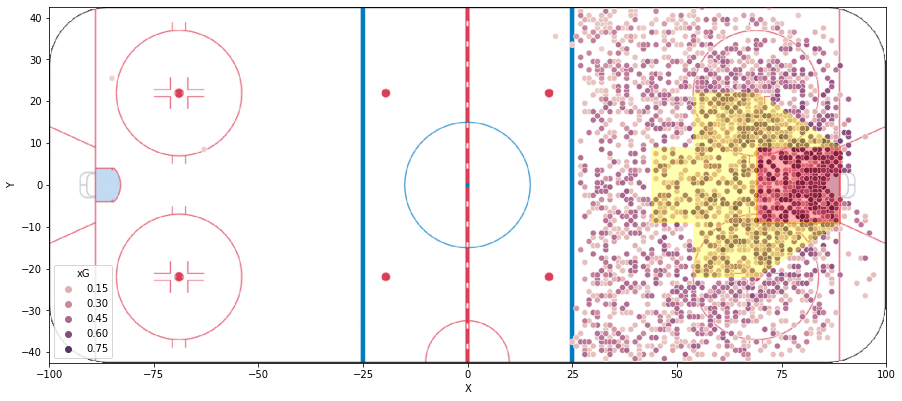

In [45]:
fig, ax = plotIce()
sns.scatterplot(x ='X', y = 'Y', data = rdata[rdata.lowHighCount == 0], ax = ax, hue = 'xG')

## Find Power Play Passing

In [46]:
# find power play opportunities
PP = rdata[rdata['homeSkaters'] != rdata['awaySkaters']]
PP

,index,clock,homeSkaters,awaySkaters,team,event,X,Y,d1,d2,d3,d4,isLat,isLowHigh,isRush,isRebound,shotQuality,shotDistance,shotAngle,isGoal,timeDiff,isReboundShot,lowHighCount,latCount,xG
level_0,,,,,,,,,,,,,,,,,,,,,,,,,
223,223,737,4,5,Boston Pride,Shot,66,-10.5,Snapshot,On Net,t,f,0,0,NaN,NaN,2.0,25.28,-24.537728,0,3,1.0,1.0,0.0,0.197324
253,253,674,4,5,Boston Pride,Shot,35,-6.5,Slapshot,On Net,t,t,0,0,NaN,NaN,1.0,54.39,-6.863692,0,0,1.0,0.0,0.0,0.114851
306,306,575,4,5,Boston Pride,Shot,50,-27.5,Snapshot,On Net,t,f,0,0,NaN,NaN,1.0,47.72,-35.188743,0,2,1.0,1.0,1.0,0.116114
318,318,555,4,5,Minnesota Whitecaps,Shot,88,-9.5,Wrap Around,Blocked,f,f,0,0,1.0,NaN,3.0,9.55,-83.990994,0,1,1.0,0.0,0.0,0.171671
344,344,498,4,5,Minnesota Whitecaps,Shot,69,-15.5,Snapshot,Blocked,t,f,0,0,1.0,NaN,3.0,25.30,-37.775684,0,1,1.0,0.0,1.0,0.225782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50832,23950,118,5,4,Olympic (Women) - Finland,Shot,57,-26.5,Wristshot,Blocked,t,f,0,0,1.0,NaN,2.0,41.55,-39.629005,0,2,NaN,0.0,0.0,0.427710
50847,23965,84,4,3,Olympic (Women) - Finland,Shot,50,-25.5,Slapshot,On Net,t,t,0,0,NaN,NaN,1.0,46.60,-33.178512,0,1,NaN,0.0,1.0,0.481118
50861,23979,42,4,3,Olympic (Women) - Finland,Shot,66,-13.5,Wristshot,Missed,t,f,0,0,NaN,NaN,2.0,26.67,-30.411081,0,1,NaN,0.0,0.0,0.652726


In [47]:
lowLat = PP[(PP['lowHighCount'] >= 1) | (PP['latCount'] >= 1)]
lowLat

,index,clock,homeSkaters,awaySkaters,team,event,X,Y,d1,d2,d3,d4,isLat,isLowHigh,isRush,isRebound,shotQuality,shotDistance,shotAngle,isGoal,timeDiff,isReboundShot,lowHighCount,latCount,xG
level_0,,,,,,,,,,,,,,,,,,,,,,,,,
223,223,737,4,5,Boston Pride,Shot,66,-10.5,Snapshot,On Net,t,f,0,0,NaN,NaN,2.0,25.28,-24.537728,0,3,1.0,1.0,0.0,0.197324
306,306,575,4,5,Boston Pride,Shot,50,-27.5,Snapshot,On Net,t,f,0,0,NaN,NaN,1.0,47.72,-35.188743,0,2,1.0,1.0,1.0,0.116114
344,344,498,4,5,Minnesota Whitecaps,Shot,69,-15.5,Snapshot,Blocked,t,f,0,0,1.0,NaN,3.0,25.30,-37.775684,0,1,1.0,0.0,1.0,0.225782
688,688,921,4,5,Boston Pride,Shot,39,-16.5,Wristshot,Missed,t,f,0,0,NaN,NaN,1.0,52.65,-18.262890,0,1,1.0,1.0,1.0,0.104446
711,711,860,4,5,Boston Pride,Shot,29,26.5,Slapshot,Blocked,t,f,0,0,NaN,NaN,1.0,65.59,23.829449,0,1,1.0,1.0,1.0,0.076888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48365,21483,855,5,4,Olympic (Women) - Finland,Shot,39,6.5,Wristshot,On Net,t,f,0,0,1.0,NaN,2.0,50.42,7.406912,0,1,NaN,1.0,1.0,0.428988
49872,22990,1160,4,5,Olympic (Women) - United States,Shot,62,-21.5,Slapshot,On Net,f,f,0,0,NaN,NaN,2.0,34.51,-38.530180,0,3,NaN,1.0,0.0,0.521247
50571,23689,747,3,4,Olympic (Women) - United States,Shot,50,18.5,Fan,Blocked,t,t,0,0,NaN,NaN,1.0,43.17,25.377744,0,1,NaN,0.0,1.0,0.253129


In [ ]:
seperateChunks(data)

In [49]:
chunks = data.reset_index().set_index(['chunk', 'chunkIdx'])
chunks

level_0  index    gameDate  ...        xG lowHighCount  latCount
chunk   chunkIdx                              ...                                 
1.0     0.0             0      0  2021-01-23  ...       NaN          NaN       NaN
        1.0             1      1  2021-01-23  ...       NaN          NaN       NaN
        2.0             2      2  2021-01-23  ...       NaN          NaN       NaN
        3.0             3      3  2021-01-23  ...  0.097787          0.0       0.0
2.0     0.0             4      4  2021-01-23  ...       NaN          NaN       NaN
...                   ...    ...         ...  ...       ...          ...       ...
13178.0 2.0         50879  23997  2019-04-14  ...       NaN          NaN       NaN
        3.0         50880  23998  2019-04-14  ...       NaN          NaN       NaN
        4.0         50881  23999  2019-04-14  ...       NaN          NaN       NaN
        5.0         50882  24000  2019-04-14  ...       NaN          NaN       NaN
13179.0 0.0         50883  24001  2019-04-14  ...       NaN          NaN       NaN

[51021 rows x 31 columns]

In [50]:

passIndex = np.array(lowLat.index)
eventAfter = passIndex + 1
# data.iloc[eventAfter].groupby("event").count()[['home']]

chunks_withLatLowIdx = np.unique(np.array(list(zip(*chunks.iloc[passIndex].index))[0]))
# create pandas index slice and access all chunks that contain lat low pass
idx = pd.IndexSlice
chunks_withLatLow = chunks.loc[idx[chunks_withLatLowIdx],:]
chunks_withLatLow

level_0  index    gameDate  ...        xG lowHighCount  latCount
chunk   chunkIdx                              ...                                 
58.0    0.0           211    211  2021-01-23  ...       NaN          NaN       NaN
        1.0           212    212  2021-01-23  ...       NaN          NaN       NaN
        2.0           213    213  2021-01-23  ...       NaN          NaN       NaN
        3.0           214    214  2021-01-23  ...       NaN          NaN       NaN
        4.0           215    215  2021-01-23  ...       NaN          NaN       NaN
...                   ...    ...         ...  ...       ...          ...       ...
13139.0 33.0        50707  23825  2019-04-14  ...       NaN          NaN       NaN
        34.0        50708  23826  2019-04-14  ...       NaN          NaN       NaN
        35.0        50709  23827  2019-04-14  ...  0.355219          NaN       NaN
        36.0        50710  23828  2019-04-14  ...       NaN          NaN       NaN
        37.0        50711  23829  2019-04-14  ...       NaN          NaN       NaN

[1694 rows x 31 columns]

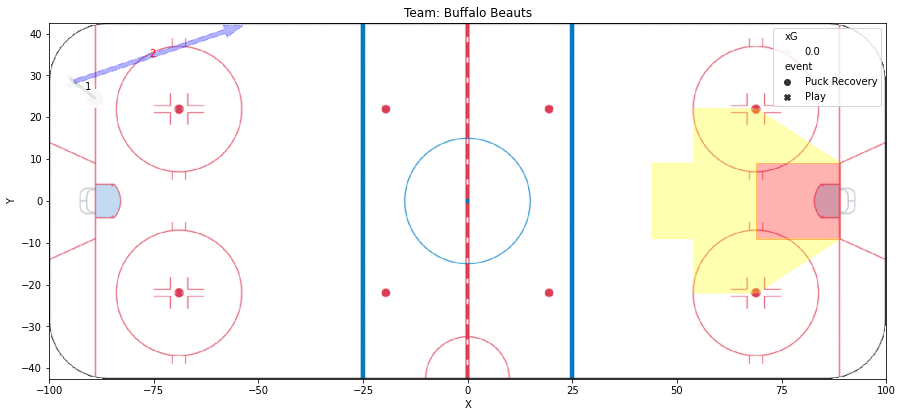

In [51]:
fig, ax = plotIce()
mapPassEvents(chunks.loc[593], fig, ax)

ValueError: ignored

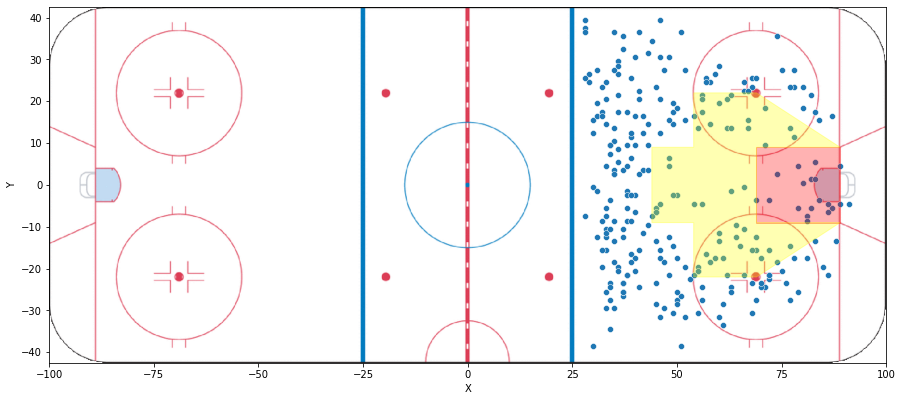

In [52]:
fig, ax = plotIce()
sns.scatterplot(x= 'X', y = 'Y', data = lowLat, ax = ax)
sns.scatterplot(x= 'X2', y = 'Y2', data = lowLat, ax = ax, color = 'red')

In [ ]:
n = 890
fig, ax = plotIce()
mapPassEvents(chunks.loc[n], fig, ax)
chunks.loc[n]

In [ ]:
for i in chunks_withLatLowIdx[:30]:
  fig, ax = plotIce()
  mapPassEvents(chunks.loc[i], fig, ax)

# Exploring Data


In [ ]:
# create indexes for low high
lowHighStart = (passes['X'] >= 69)
lowHighEnd = (passes['X2'] <= 44) & (passes['X2'] >= 24)
lowHigh = passes[lowHighStart & lowHighEnd]
# plot to confirm location
fig, ax = plotIce()
sns.scatterplot(x= 'X', y = 'Y', data = lowHigh, ax = ax)
sns.scatterplot(x= 'X2', y = 'Y2', data = lowHigh, ax = ax, color = 'red')
# display data frame
lowHigh

In [ ]:
## find all pass attempts (labled as Play)
passes = PP[(PP.event == "Play") | (PP.event == "Incomplete Play")]
# define a "lateral" pass
lateralStart = ((passes['X'] >= 54) & (passes['Y'] <= -22) | (passes['Y'] >= 22)) # check if lateral pass will start in right location
lateralEnd = ((passes['X2'] >= 54) & (passes['Y2'] <= -22) | (passes['Y2'] >= 22)) # check if lateral pass will end in right location
lateral = passes[lateralStart & lateralEnd & (passes['X'] >= 54) & (passes['X2'] >= 54)] # data frame with just lateral passes
# graph start and end location of lateral passes to confirm
fig, ax = plotIce()
sns.scatterplot(x= 'X', y = 'Y', data = lateral, ax = ax)
sns.scatterplot(x= 'X2', y = 'Y2', data = lateral, ax = ax, color = 'red')
# display data frame
lateral

# Zone Entries

In [ ]:
eZoneEntries = erie[erie['event'] == 'Zone Entry'].reset_index()
eZoneEntries.head()

In [ ]:
erie[((erie.homeSkaters <= 4) | (erie.awaySkaters <= 4)) & (erie.event == "Shot") & (erie.d2 == "On Net")]

# Scoring Chance Regions

# Passing patterns

In [ ]:
ePass = erie.loc[(erie['event'] == "Play") | (erie['event'] == "Incomplete Play")]
ePass

In [ ]:
fig, ax = plotIce()
colors = {
      'Incomplete Play': 'red',
      'Play': 'blue'
  }
tofP = {
    'Direct': '-',
    'Indirect': '-.'
}

for index, play in ePass.iterrows():
  cColor = colors[play['event']]
  ctype = tofP[play['d1']]
  ax.arrow(play['X'], play['Y'], (play['X2'] - play['X']), (play['Y2'] - play['Y']), head_width=3, linestyle = ctype, color = cColor, width=1, alpha = 0.3,)

### Identifying Plays

In [ ]:
firstPlay = chunks[chunks.index.get_level_values('chunkIdx') == 1]#.reset_index('chunkIdx')
lastPlay = chunks[np.roll(chunks.index.get_level_values('chunkIdx') == 1, -1)]#.reset_index('chunkIdx')
h = lastPlay.reset_index(['chunk', 'chunkIdx'])
h['chunkIdx'] = 2
lastPlay = h.set_index(['chunk', 'chunkIdx'])

In [ ]:
a = np.array(list(zip(*chunks[(chunks['awaySkaters'] <= 4) | (chunks['homeSkaters'] <= 4)].index))[0])
ppI = np.unique(a)
ppI[20:30]

In [ ]:
type(erie.groupby(["player","event"]).count())

In [ ]:
firstLastPlay = pd.concat([firstPlay, lastPlay], axis = 0,).sort_index() #.reset_index().#.set_index(['chunk', 'chunkIdx'])
firstLastPlay

#### Breakouts

In [ ]:
index1 = firstLastPlay.loc[(slice(None), 1), "X"] <= -24
index2 = firstLastPlay.loc[(slice(None), 2), "X"] >= -24
a1 = list(zip(*firstLastPlay.loc[(slice(None), 1),:][index1].index))[0]
b1 = list(zip(*firstLastPlay.loc[(slice(None), 2),:][index2].index))[0]
breakoutI = list(set(a1).intersection(b1))
breakoutI.sort()
breakouts = chunks.loc[breakoutI,:]
breakouts

In [ ]:
count = 80
for i in breakoutI:
  fig, ax = plotIce()
  mapPassEvents(breakouts.loc[i], fig, ax)
  count += 1
  if count == 90:
    break

In [ ]:
h = lastPlay.reset_index(['chunk', 'chunkIdx'])
h['chunkIdx'] = 2
h.set_index(['chunk', 'chunkIdx'])